In [249]:
# Ładowanie danych
from sklearn.datasets import load_breast_cancer
# dane zawierjaa wyniki badan guz peirsi (klasyfikacja binarna czy guz jest zlosliwy czy nie)
cancer_data = load_breast_cancer()
X = cancer_data.data
Y = cancer_data.target
print('Wiklosc zbioru wejsciowego', X.shape)
print('Wiklosc zbirou wyjsciowego', Y.shape)
print('Etykiety:', cancer_data.target_names)

Wiklosc zbioru wejsciowego (569, 30)
Wiklosc zbirou wyjsciowego (569,)
Etykiety: ['malignant' 'benign']


In [250]:
n_pos = (Y==1).sum()
n_neg = (Y==0).sum()
print(f"liscza wynikow pozytywnych: {n_pos}, liczba wynikow negatywnych: {n_neg}")

liscza wynikow pozytywnych: 357, liczba wynikow negatywnych: 212


In [251]:
# podzial elementow na podzbiory treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(Y_train), len(Y_test)

(455, 114, 455, 114)

In [252]:
# Uzycei maszyny wektorow nosnych
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, random_state=42, probability=True)
clf.fit(X_train, Y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [253]:
# Sprawdzenie efektywnosci modelu
acc = clf.score(X_test, Y_test)
print(f"Dokładnosc modelu: {acc*100:.2f}%")

Dokładnosc modelu: 95.61%


In [254]:
# przewidywania
predictions = clf.predict(X_test)
predictions[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [255]:
# prawdopodobienstwo prby
prediction_proba = clf.predict_proba(X_test)
prediction_proba[:10]

array([[2.26207233e-01, 7.73792767e-01],
       [9.99991000e-01, 9.00044270e-06],
       [9.84374585e-01, 1.56254149e-02],
       [5.63032549e-03, 9.94369675e-01],
       [6.19574273e-06, 9.99993804e-01],
       [9.99999831e-01, 1.69139902e-07],
       [9.99999900e-01, 1.00000010e-07],
       [9.35367199e-01, 6.46328012e-02],
       [6.20761412e-02, 9.37923859e-01],
       [2.55376930e-02, 9.74462307e-01]])

In [256]:
# krzywa ROC from scrach
import numpy as np

def ROC_graph(Y_true, prediction_prob):
  """
  Funckja rysuje wykres ROC na podsawie prawidzywich danych i uch predykcji
  @param Y_true: prawdziwy wartosc uzyskana
  @param predict: dane otzymane na podstwie wyszkolenego modelu (prawdopodobienstow przynalerznosci do danej klasy)
  @return dwu elementowa liste zawierajaca false_pos_rate i true_pos_rate
  """
  pos_prob = prediction_prob[:, 1]
  thresholds = np.arange(0.0, 1.1, 0.05)
  true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
  for pred, y in zip(pos_prob, Y_true):
    for i, threshold in enumerate(thresholds):
      if pred >= threshold:
        if y == 1:
          true_pos[i] += 1
        else:
          false_pos[i] += 1
      else:
        break

  n_pos_test = (Y_true == 1).sum()
  n_neg_test = (Y_true == 0).sum()

  true_pos_rate = [tp / n_pos_test for tp in true_pos]
  false_pos_rate = [fp / n_neg_test for fp in false_pos]

  return true_pos_rate, false_pos_rate

In [257]:
true_pos_rate, false_pos_rate = ROC_graph(Y_true=Y_test,
                                          prediction_prob=prediction_proba)

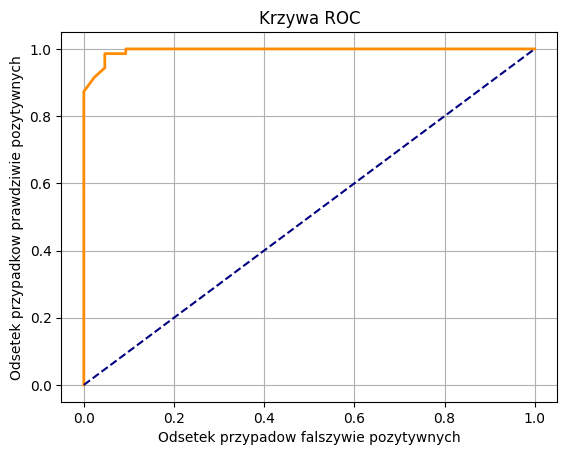

In [258]:
# rysiwanie wykresu ROC
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("Odsetek przypadow falszywie pozytywnych")
plt.ylabel("Odsetek przypadkow prawdziwie pozytywnych")
plt.title("Krzywa ROC")
plt.grid(True)
plt.show()

In [259]:
# Urzycie naiwnego klasyfikatora Bayessa
from sklearn.naive_bayes import MultinomialNB, GaussianNB

clf = MultinomialNB(alpha=1.0, fit_prior=True)

clf_gauss = GaussianNB()

clf.fit(X_train, Y_train)

clf_gauss.fit(X_train, Y_train)

GaussianNB()

In [260]:
# Pradobpodibienstwo
prediction_proba = clf.predict_proba(X_test)
print(prediction_proba[:5])

prediction_proba_gauss = clf_gauss.predict_proba(X_test)
print(prediction_proba_gauss[:5])

[[6.13436311e-06 9.99993866e-01]
 [1.00000000e+00 5.32490062e-47]
 [1.00000000e+00 1.05129182e-13]
 [1.45821679e-16 1.00000000e+00]
 [1.86092861e-13 1.00000000e+00]]
[[2.42625723e-09 9.99999998e-01]
 [1.00000000e+00 1.08688415e-58]
 [9.99999999e-01 6.07872900e-10]
 [1.50822001e-11 1.00000000e+00]
 [2.03620972e-14 1.00000000e+00]]


In [261]:
# Predykcje
predict = clf.predict(X_test)
predict[:5]

predict_gauss = clf_gauss.predict(X_test)

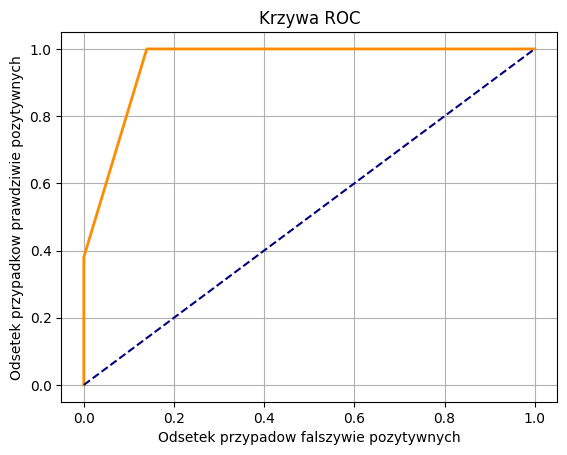

In [262]:
# Wykres ROC dla naivnego klasyfiktora Bayessa (MultinomialNB)
true_pos_rate, false_pos_rate = ROC_graph(Y_true=Y_test,
                                          prediction_prob=prediction_proba)

plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("Odsetek przypadow falszywie pozytywnych")
plt.ylabel("Odsetek przypadkow prawdziwie pozytywnych")
plt.title("Krzywa ROC")
plt.grid(True)
plt.show()

In [263]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_Multi = {"model name": "naive Bayes Multi",
             'acc': round(accuracy_score(predict, Y_test)*100, 2)}
acc_Multi

{'model name': 'naive Bayes Multi', 'acc': 93.86}

In [264]:
acc_gauss = {"model name": "naive Bayess Gauss",
            'acc': round(accuracy_score(predict_gauss, Y_test)*100, 2)}


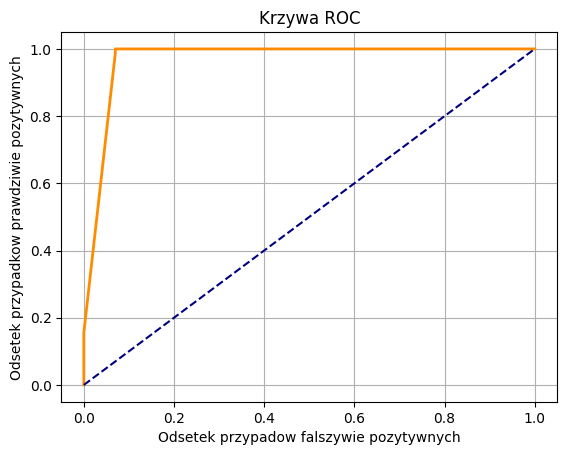

In [265]:
# Wykres ROC dla naivnego Bayssa (Gaussa)
true_pos_rate, false_pos_rate = ROC_graph(Y_true=Y_test,
                                          prediction_prob=prediction_proba_gauss)

plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("Odsetek przypadow falszywie pozytywnych")
plt.ylabel("Odsetek przypadkow prawdziwie pozytywnych")
plt.title("Krzywa ROC")
plt.grid(True)
plt.show()

In [266]:
# sprawdzenie danych na NN
import torch
from torch import nn

class breast_cancer_classyfication(nn.Module):
  def __init__(self,
               imput_shape: int,
               hidden_unit: int,
               output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
                  nn.Linear(in_features=imput_shape,
                            out_features=hidden_unit),
                  nn.ReLU(),
                  nn.Linear(in_features=hidden_unit,
                            out_features=hidden_unit),
                  nn.ReLU(),
                  nn.Linear(in_features=hidden_unit,
                            out_features=output_shape)
                  )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.block1(x)

In [267]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [268]:
print(f"tyle musi byc neuronow wejsocwych: {X[0].shape[0]}")
print(f"tyle ma byc neuronow wyjsciowych: {Y[0].shape}")

tyle musi byc neuronow wejsocwych: 30
tyle ma byc neuronow wyjsciowych: ()


In [269]:
def accuracy_fun(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [270]:
device = 'cpu'
import numpy as np

if isinstance(X_train, np.ndarray):
    X_train, X_test = torch.from_numpy(X_train).type(torch.float32), torch.from_numpy(X_test).type(torch.float32)
    Y_train, Y_test = torch.from_numpy(Y_train).type(torch.float32), torch.from_numpy(Y_test).type(torch.float32)

X_train[0].size()[0]

30

In [271]:
model0 = breast_cancer_classyfication(imput_shape=X_test[0].size()[0],
                                      hidden_unit=100,
                                      output_shape=2).float()

In [272]:
model0.state_dict()

OrderedDict([('block1.0.weight',
              tensor([[ 0.1175, -0.1818, -0.1779,  ..., -0.1023, -0.0849, -0.0312],
                      [ 0.1355,  0.0260, -0.1563,  ..., -0.0474,  0.0606, -0.1639],
                      [-0.0941,  0.1166,  0.1696,  ...,  0.0977,  0.0396,  0.1259],
                      ...,
                      [-0.0825,  0.0737,  0.0181,  ...,  0.0194,  0.1477,  0.0445],
                      [-0.0162,  0.1520,  0.0059,  ...,  0.0703, -0.1049, -0.1728],
                      [ 0.0712, -0.0340,  0.0541,  ...,  0.1825,  0.1716,  0.0831]])),
             ('block1.0.bias',
              tensor([-0.0746, -0.0694,  0.1311, -0.0381,  0.0279,  0.1825, -0.1815, -0.0417,
                      -0.0722, -0.0296,  0.0075, -0.0395,  0.1772,  0.0740, -0.1147,  0.1769,
                      -0.0507,  0.0263,  0.0170, -0.1342,  0.0929, -0.1109, -0.1627,  0.1533,
                       0.1093, -0.0764, -0.1307,  0.1649,  0.0646, -0.1212, -0.1517, -0.0755,
                      -0.1

In [273]:
X_train.size(), Y_train.size()

(torch.Size([455, 30]), torch.Size([455]))

In [274]:
Y_logits = model0(X_train)
Y_logits[:3].squeeze(dim=1)

tensor([[  5.6465,  -9.0927],
        [ 29.2272, -43.4049],
        [  6.1745,  -8.7894]], grad_fn=<SqueezeBackward1>)

In [275]:
from tqdm import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# optimazer i funcka bladu
optim = torch.optim.Adam(params=model0.parameters(),
                         lr=0.01)

loss_fn = nn.BCEWithLogitsLoss()

X_train, X_test, Y_train, Y_test = X_train.to(device), X_test.to(device), Y_train.to(device), Y_test.to(device)
epochs = 100

for epoch in tqdm(range(epochs)):
    # Trening
    model0.train()

    Y_logits = model0(X_train)
    Y_logits_squeezed = Y_logits.squeeze(dim=1)[:, 0]
    Y_pred = torch.round(torch.sigmoid(Y_logits_squeezed))

    loss = loss_fn(Y_logits_squeezed, Y_train)
    acc = accuracy_fun(Y_train, Y_pred)

    optim.zero_grad()
    loss.backward()
    optim.step()

    # Walidacja
    model0.eval()
    with torch.no_grad():
        # Testowanie
        test_logits = model0(X_test)[:, 0]
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(torch.sigmoid(test_logits), Y_test)
        test_acc = accuracy_fun(Y_test, test_pred)

        if epoch % 10 == 0:
            print(f"epoch: {epoch}, loss: {loss:.2f}, acc: {acc:.2f}% | test loss: {test_loss:.2f}, test acc: {test_acc:.2f}%")


  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 8.49, acc: 62.86% | test loss: 0.69, test acc: 37.72%
epoch: 10, loss: 1.60, acc: 37.14% | test loss: 0.67, test acc: 37.72%
epoch: 20, loss: 0.37, acc: 87.25% | test loss: 0.53, test acc: 94.74%


 52%|█████▏    | 52/100 [00:00<00:00, 256.41it/s]

epoch: 30, loss: 0.26, acc: 90.99% | test loss: 0.50, test acc: 94.74%
epoch: 40, loss: 0.22, acc: 91.65% | test loss: 0.49, test acc: 96.49%
epoch: 50, loss: 0.22, acc: 90.99% | test loss: 0.49, test acc: 96.49%


 78%|███████▊  | 78/100 [00:00<00:00, 256.08it/s]

epoch: 60, loss: 0.21, acc: 91.21% | test loss: 0.49, test acc: 96.49%
epoch: 70, loss: 0.20, acc: 91.65% | test loss: 0.49, test acc: 96.49%
epoch: 80, loss: 0.19, acc: 92.09% | test loss: 0.49, test acc: 96.49%


100%|██████████| 100/100 [00:00<00:00, 252.67it/s]

epoch: 90, loss: 0.18, acc: 92.75% | test loss: 0.49, test acc: 96.49%


In [282]:
Y_logits = model0(X_train)

true_pos_rate, false_pos_rate = ROC_graph(Y_true=Y_test,
                                          prediction_prob=Y_logits)

In [277]:
Neural_network_acc = {"model name": "Nonlinear NN",
                      "acc": round(test_acc, 2)}

In [278]:
# sprawdzenie wartosci dla liniwych sieci neuronowych

class breast_cancer_classyfication_linear(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_unit: int,
               output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
                  nn.Linear(in_features=input_shape,
                            out_features=hidden_unit),
                  nn.Linear(in_features=hidden_unit,
                            out_features=hidden_unit),
                  nn.Linear(in_features=hidden_unit,
                            out_features=output_shape)
    )
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.block1(x)

In [279]:
model1 = breast_cancer_classyfication_linear(input_shape=X_test[0].size()[0],
                                      hidden_unit=100,
                                      output_shape=2).float()
# optimazer i funcka bladu
optim = torch.optim.Adam(params=model1.parameters(),
                         lr=0.01)

loss_fn = nn.BCEWithLogitsLoss()

X_train, X_test, Y_train, Y_test = X_train.to(device), X_test.to(device), Y_train.to(device), Y_test.to(device)
epochs = 100

for epoch in tqdm(range(epochs)):
    # Trening
    model1.train()

    Y_logits = model1(X_train)
    Y_logits_squeezed = Y_logits.squeeze(dim=1)[:, 0]
    Y_pred = torch.round(torch.sigmoid(Y_logits_squeezed))

    loss = loss_fn(Y_logits_squeezed, Y_train)
    acc = accuracy_fun(Y_train, Y_pred)

    optim.zero_grad()
    loss.backward()
    optim.step()

    # Walidacja
    model1.eval()
    with torch.no_grad():
        # Testowanie
        test_logits = model0(X_test)[:, 0]
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(torch.sigmoid(test_logits), Y_test)
        test_acc = accuracy_fun(Y_test, test_pred)

        if epoch % 10 == 0:
            print(f"epoch: {epoch}, loss: {loss:.2f}, acc: {acc:.2f}% | test loss: {test_loss:.2f}, test acc: {test_acc:.2f}%")

linera_acc = {"model name": "linera NN",
              'acc': round(test_acc, 2)}

 21%|██        | 21/100 [00:00<00:00, 208.61it/s]

epoch: 0, loss: 1.37, acc: 61.54% | test loss: 0.49, test acc: 94.74%
epoch: 10, loss: 7.39, acc: 37.80% | test loss: 0.49, test acc: 94.74%
epoch: 20, loss: 3.94, acc: 46.15% | test loss: 0.49, test acc: 94.74%


 52%|█████▏    | 52/100 [00:00<00:00, 262.02it/s]

epoch: 30, loss: 0.51, acc: 89.01% | test loss: 0.49, test acc: 94.74%
epoch: 40, loss: 0.25, acc: 90.99% | test loss: 0.49, test acc: 94.74%
epoch: 50, loss: 0.27, acc: 90.99% | test loss: 0.49, test acc: 94.74%


 79%|███████▉  | 79/100 [00:00<00:00, 262.17it/s]

epoch: 60, loss: 0.24, acc: 91.21% | test loss: 0.49, test acc: 94.74%
epoch: 70, loss: 0.24, acc: 90.55% | test loss: 0.49, test acc: 94.74%
epoch: 80, loss: 0.24, acc: 91.65% | test loss: 0.49, test acc: 94.74%


100%|██████████| 100/100 [00:00<00:00, 256.24it/s]

epoch: 90, loss: 0.23, acc: 90.77% | test loss: 0.49, test acc: 94.74%


In [280]:
import pandas as pd
compare_result = pd.DataFrame([linera_acc, Neural_network_acc, acc_gauss, acc_Multi])

print(compare_result)

           model name    acc
0           linera NN  94.74
1        Nonlinear NN  94.74
2  naive Bayess Gauss  97.37
3   naive Bayes Multi  93.86
